In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML
import random as rnd
%matplotlib inline

In [5]:
### PARAMETERS ###
updateInterval = 200
epochs = 100
world_size = 50
group_size = 2
alive = 1
dead = 0

In [6]:
def init_grid(world_size): 
    return np.random.choice([0,1], world_size*world_size, p=[0.8, 0.2]).reshape(world_size, world_size) 

In [7]:
world = init_grid(world_size)
group = init_grid(group_size)

In [8]:
def update_world(frame, img, world, world_size):
    # Make a copy of the current state, to be modified
    next_world = world.copy()
    # Loop over rows and columns of current state
    for row in range(world_size):
        for col in range(world_size):
            # Apply periodic boundary conditions:
            # Look at neighbors (0,-1), (0,1), (-1,0), (1,0), (-1,-1), (-1,1), (1,-1), (1,1) and count them
            num_neighbors = int((world[row, (col-1)%world_size] + world[row, (col+1)%world_size] + 
                         world[(row-1)%world_size, col]                + world[(row+1)%world_size, col] + 
                         world[(row-1)%world_size, (col-1)%world_size] + world[(row-1)%world_size, (col+1)%world_size] + 
                         world[(row+1)%world_size, (col-1)%world_size] + world[(row+1)%world_size, (col+1)%world_size]))
            
            # Apply Conway's rules     
            if world[row, col]  == alive: 
                if (num_neighbors < 2) or (num_neighbors > 3): 
                    next_world[row, col] = dead
            else: 
                if num_neighbors == 3: 
                    next_world[row, col] = alive 
            #
            img.set_data(next_world)
    world[:] = next_world[:]
    return img,

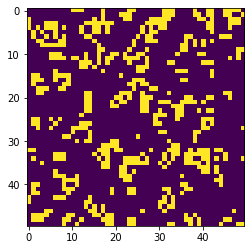

In [9]:

fig, ax = plt.subplots() 
img = ax.imshow(world, interpolation='none') 
ani = animation.FuncAnimation(fig, update_world, fargs=(img, world, world_size, ), 
                                  frames = epochs, 
                                  interval=updateInterval, 
                                  save_count=50) 
##

In [10]:
## This may take a while to run
HTML(ani.to_html5_video())